<font color='orange'>**Please create your own copy before starting modification**</font>

In [37]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd 
from google.colab import drive
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


Dependencies: Add Your dependencies here

In [38]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Data_Decision_Trees - Sheet1.csv' 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Code

<font color='red'>**Part 1**</font>

<font color='cyan'>**Dataset: The dataset represents the mood of a student to go to class depending on the weather at IIT Jodhpur. We have been accustomed to online classes so this is to give you folks a feeling of attending classes in the post COVID scenario.**</font>

A sample of the dataset is shown

In [39]:
# dic = {'Time':'Morning','Temperature':'Hot','Friend_Attending':'No','Windy':'Yes','Attend':'Yes'}
# df= pd.DataFrame(dic,index=[0])
# df

Read the complete data from the CSV file at link: "Add Link to CSV here"



In [40]:
df = pd.read_csv(file_path)
df

,Time,Temperature,Friend_Attending,Windy,Attend
0,Morning,Hot,Yes,Low,No
1,Morning,Hot,Yes,High,No
2,Afternoon,Hot,Yes,Low,Yes
3,Evening,Warm,Yes,Low,Yes
4,Evening,Cool,No,Low,Yes
5,Evening,Cool,No,High,No
6,Afternoon,Cool,No,High,Yes
7,Morning,Warm,Yes,Low,No
8,Morning,Cool,No,Low,Yes
9,Evening,Warm,No,Low,Yes


<font color='red'>**Part 2**</font>

Implement the same using Scikit Learn

Preprocessing

In [41]:
df = df.replace({'Yes':1 ,'No':0,'High':1,'Low':0,'Morning':0,'Afternoon':1,'Evening':2, 'Hot':2,'Warm':1,'Cool':0})

Shuffle the data frame

In [42]:
df.sample(frac = 1)

,Time,Temperature,Friend_Attending,Windy,Attend
7,0,1,1,0,0
4,2,0,0,0,1
10,0,1,0,1,1
2,1,2,1,0,1
12,1,2,0,0,1
13,2,1,1,1,0
6,1,0,0,1,1
8,0,0,0,0,1
9,2,1,0,0,1
11,1,1,1,1,1


Take two for testing and rest for training

In [43]:

x= df.drop(['Attend'], axis=1)
y= df['Attend']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= (1/7), random_state=0)
df

,Time,Temperature,Friend_Attending,Windy,Attend
0,0,2,1,0,0
1,0,2,1,1,0
2,1,2,1,0,1
3,2,1,1,0,1
4,2,0,0,0,1
5,2,0,0,1,0
6,1,0,0,1,1
7,0,1,1,0,0
8,0,0,0,0,1
9,2,1,0,0,1


Display Training

In [44]:
x_train


,Time,Temperature,Friend_Attending,Windy
4,2,0,0,0
11,1,1,1,1
2,1,2,1,0
13,2,1,1,1
9,2,1,0,0
1,0,2,1,1
7,0,1,1,0
10,0,1,0,1
3,2,1,1,0
0,0,2,1,0


In [45]:
y_train

4     1
11    1
2     1
13    0
9     1
1     0
7     0
10    1
3     1
0     0
5     0
12    1
Name: Attend, dtype: int64

Display Testing

In [46]:
x_test

,Time,Temperature,Friend_Attending,Windy
8,0,0,0,0
6,1,0,0,1


In [47]:
y_test

8    1
6    1
Name: Attend, dtype: int64

*Given* the following data construct a decision tree using Entropy


In [48]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Fit the classifier using Gini Impurity

In [49]:
clf_gini = DecisionTreeClassifier(criterion='gini') 
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Print the cross validation score with folds = 5

In [50]:
s = cross_val_score(clf_gini, x, y, cv=5)
s

array([0.66666667, 1.        , 1.        , 0.33333333, 0.5       ])

Print the depth of the decison Tree

In [51]:
de = clf_entropy.get_depth()
dg = clf_gini.get_depth()
print(de,dg)

3 3


Print the number of leaves in the decision Tree

In [52]:
len_entropy = clf_entropy.get_n_leaves()
len_gini = clf_gini.get_n_leaves()
print(len_entropy,len_gini)

5 5


Return the index of the leaf that each sample is predicted as.



In [53]:
print(clf_gini.apply(x),
clf_entropy.apply(x))


[3 3 5 5 5 8 7 3 2 5 2 7 5 8] [3 3 5 5 5 8 7 3 2 5 2 7 5 8]


Print the decision path

In [54]:
print(f'{clf_gini.decision_path(x_test)}\n---\n{clf_entropy.decision_path(x_test)}')

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 4)	1
  (1, 6)	1
  (1, 7)	1
---
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 4)	1
  (1, 6)	1
  (1, 7)	1


Print the gini impurity of each feature

In [55]:
attribute_names =  ['Time', 'Temperature','Friend_Attending', 'Windy']
class_name = 'Attend'

def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n ) 
    gini = 1 - p_sum
    return gini
class_value_counts = df[class_name].value_counts()
gini_class = gini_impurity(class_value_counts)
def gini_split(attribute_name):
    attribute_values = df[attribute_name].value_counts()
    gini_a = 0 
    for key in attribute_values.keys():
        df_k = df[class_name][df[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = df.shape[0]
        gini_a = gini_a + (( n_k / n) * gini_impurity(df_k))
    return gini_a

gini_attiribute ={}
for key in attribute_names:
    gini_attiribute[key] = gini_split(key)
    print(f'Gini Impurity for {key} is {gini_attiribute[key]:.3f}')

Gini Impurity for Time is 0.343
Gini Impurity for Temperature is 0.440
Gini Impurity for Friend_Attending is 0.367
Gini Impurity for Windy is 0.429


Training Accuracy

In [56]:
# print(clf_gini.score(x_train, y_train, sample_weight=None),clf_entropy.score(x_train, y_train, sample_weight=None))
from sklearn.metrics import accuracy_score
y_pred = clf_entropy.predict(x_train)
accuracy_score(y_train,y_pred)


1.0

Testing accuracy

In [57]:
# print(clf_gini.score(x_test, y_test, sample_weight=None),clf_entropy.score(x_test, y_test, sample_weight=None))
from sklearn.metrics import accuracy_score
y_pred = clf_entropy.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

Map the query: [Time: Morning, Temperature: Warm, Friend_Attending: No, 'Wind': Low] to the correct numerical value as the training and the predict the output.

In [58]:
dic = {'Time': 0, 'Temperature': 1, 'Friend_Attending':0, 'Wind': 0}
dfc= pd.DataFrame(dic,index=[0])
print(clf_entropy.predict(dfc),clf_gini.predict(dfc))

[1] [1]


<font color='red'>**Part 3**</font>

Plot the decision tree

[Text(148.8, 190.26, 'X[0] <= 0.5\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(74.4, 135.9, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(37.2, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(223.20000000000002, 135.9, 'X[3] <= 0.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(186.0, 81.53999999999999, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(260.40000000000003, 81.53999999999999, 'X[0] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(223.20000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(297.6, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

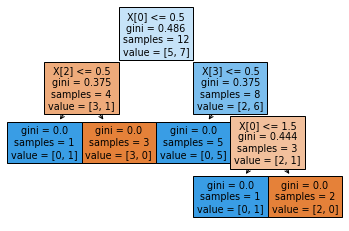

In [59]:
plot_tree(clf_gini, filled=True)

[Text(148.8, 190.26, 'X[0] <= 0.5\nentropy = 0.98\nsamples = 12\nvalue = [5, 7]'),
 Text(74.4, 135.9, 'X[2] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(37.2, 81.53999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(223.20000000000002, 135.9, 'X[3] <= 0.5\nentropy = 0.811\nsamples = 8\nvalue = [2, 6]'),
 Text(186.0, 81.53999999999999, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(260.40000000000003, 81.53999999999999, 'X[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(223.20000000000002, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(297.6, 27.180000000000007, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]')]

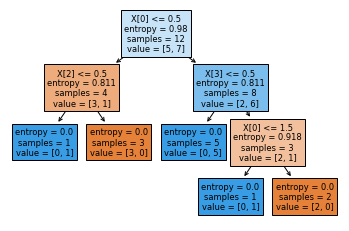

In [60]:
plot_tree(clf_entropy, filled=True)

Plot the decision surface

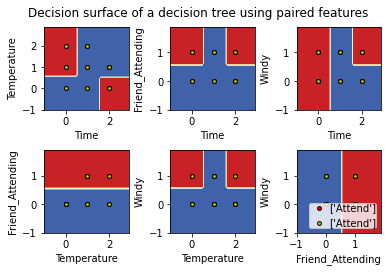

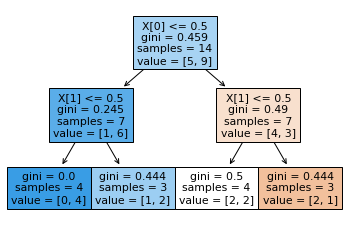

In [61]:
n_classes = 2
plot_colors = "ryb"
plot_step = 0.1

for pairidx, pair in enumerate([['Time','Temperature'], ['Time', 'Friend_Attending'], ['Time', 'Windy'],
                                ['Temperature','Friend_Attending'], ['Temperature', 'Windy'], ['Friend_Attending', 'Windy']]):
  
    X = df[pair]
    y = df['Attend']
    clf = DecisionTreeClassifier().fit(X, y)
    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[pair[0]].min() - 1, X[pair[0]].max() + 1
    y_min, y_max = X[pair[1]].min() - 1, X[pair[1]].max() + 1
    xx, yy = nm.meshgrid(nm.arange(x_min, x_max, plot_step),
                         nm.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(nm.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

    for i, color in zip(range(n_classes), plot_colors):
        idx = nm.where(y == i)
        plt.scatter(X[pair[0]], X[pair[1]], c=color, label=['Attend'],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(X, y)
plot_tree(clf, filled=True)
plt.show()

<font color='magenta'>**Part 04: Not Compulsory**</font>

Advanced: Can you implement the partitioning of the decision tree using the following algorithm

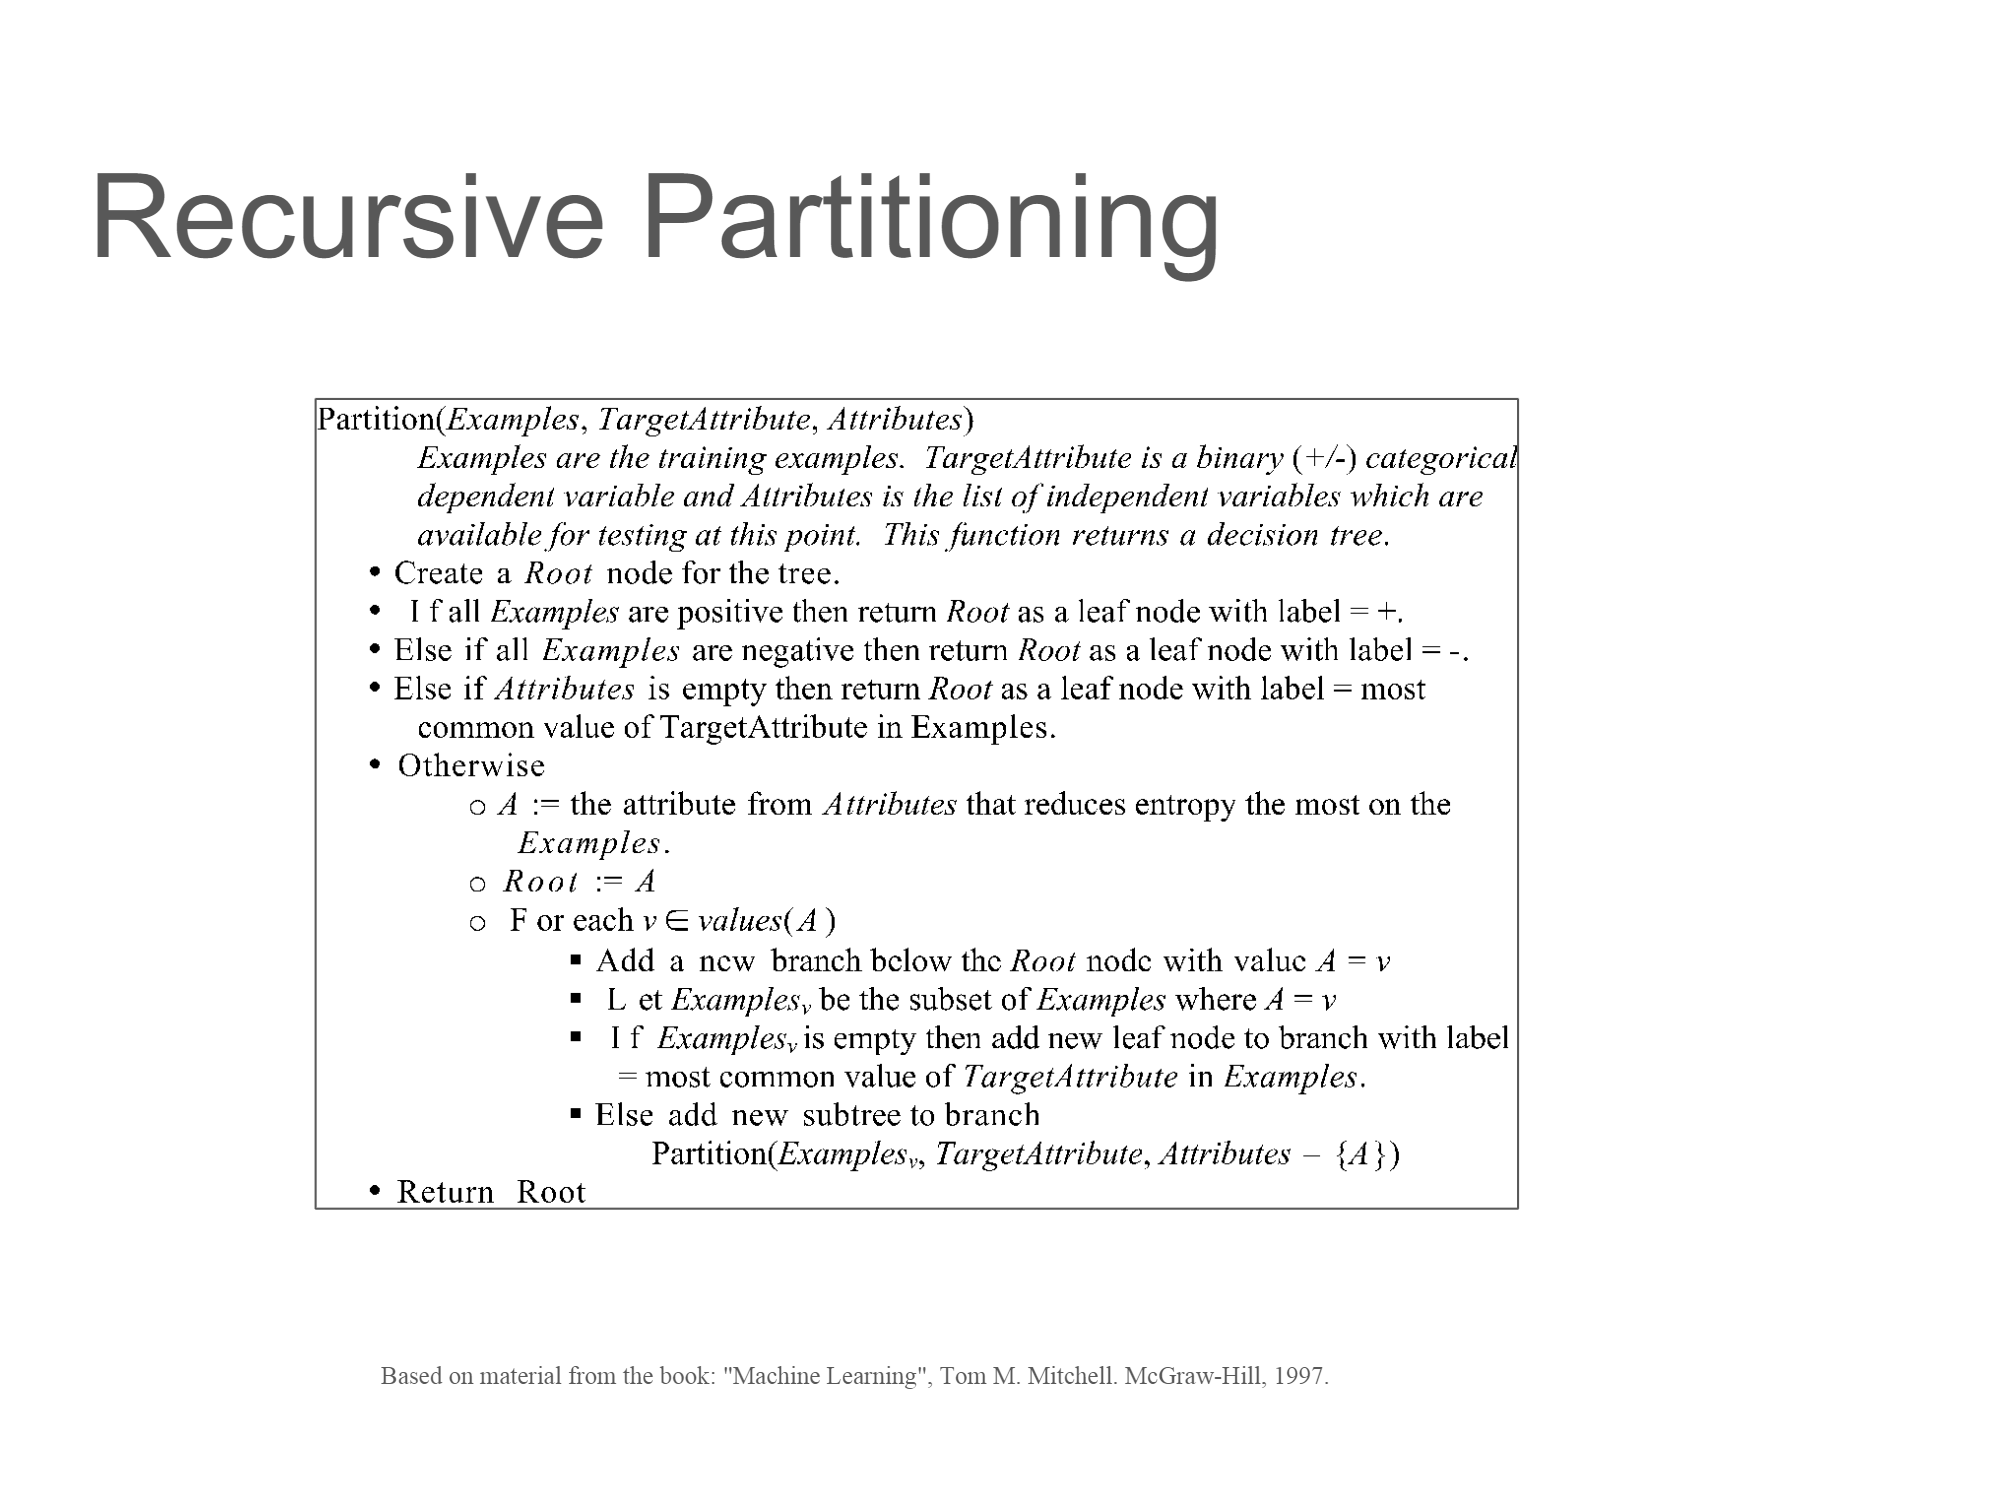

Part 5: Building Decision Trees when the data is of a continuous nature

In the previous case the nodes were broken based on entropy/gini impurity. In the case of regression the mean sqaured error is the decsion parameter for splitting the nodes. The following dataset contains continuous data and we need to use decision trees with regression.

Read the dataset

In [27]:
f_path = '/content/drive/My Drive/death.csv'
dt = pd.read_csv(f_path)
dt.head()

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46,45.9,46.1,"1,57,376",falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8


Preprocess the dataset to remove all the rows with empty column values

In [28]:
dt = dt.replace({'**':'' ,'*':''})
dt.replace('',nm.nan,inplace=True)
dt.dropna(inplace=True)
dt.reset_index(inplace=True)
dt

,index,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,0,United States,0,No,46,45.9,46.1,"1,57,376",falling,-2.4,-2.6,-2.2
1,1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8
4,5,"Union County, Florida",12125,No,113.5,89.9,141.4,19,falling,-2.2,-4.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2689,2807,"Los Alamos County, New Mexico",35028,Yes,15.8,9.4,25.4,4,stable,-2.9,-5.8,0
2690,2808,"Eagle County, Colorado",8037,Yes,14.9,8.7,23.6,5,falling,-4.9,-9.3,-0.3
2691,2810,"Utah County, Utah",49049,Yes,12.4,10.7,14.4,37,falling,-2.8,-3.9,-1.8
2692,2811,"McKinley County, New Mexico",35031,Yes,11.6,8,16.2,7,falling,-3.2,-5.7,-0.7


Convert Categorical Values to numerical

In [29]:
dt = dt.replace({'stable':1, 'falling':0,'rising':2,'Yes':1,'No':0})
dt = dt.drop(['County','index'],axis=1)
dt.replace(',','', regex=True, inplace=True)
dt['Average Deaths per Year'] = dt['Average Deaths per Year'].astype(float)
dt

,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,0,0,46,45.9,46.1,157376.0,0,-2.4,-2.6,-2.2
1,21193,0,125.6,108.9,144.2,43.0,1,-0.6,-2.7,1.6
2,21197,0,125.3,100.2,155.1,18.0,1,1.7,0,3.4
3,21189,0,118.5,83.1,165.5,8.0,1,2.2,-0.4,4.8
4,12125,0,113.5,89.9,141.4,19.0,0,-2.2,-4.3,0
...,...,...,...,...,...,...,...,...,...,...
2689,35028,1,15.8,9.4,25.4,4.0,1,-2.9,-5.8,0
2690,8037,1,14.9,8.7,23.6,5.0,0,-4.9,-9.3,-0.3
2691,49049,1,12.4,10.7,14.4,37.0,0,-2.8,-3.9,-1.8
2692,35031,1,11.6,8,16.2,7.0,0,-3.2,-5.7,-0.7


Split the dataset into train and test(Based on split size)

In [62]:
x1= dt.drop(['Upper 95% Confidence Interval for Trend'], axis=1)
y1= dt['Upper 95% Confidence Interval for Trend']
x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size= 0.2, random_state=3)

Print the cross validation score with folds = 5

In [63]:
regr = DecisionTreeRegressor(max_depth=12)
s1 = cross_val_score(regr, x1, y1, cv=5)
s1

array([0.64898167, 0.84668175, 0.46610293, 0.08893629, 0.93326912])

Perform the decision tree regression

In [64]:
regr.fit(x1_train, y1_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=12,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Predict on test dataset

In [65]:
y1_pred = regr.predict(x1_test)
y1_pred

array([ 0.7       ,  1.4       ,  1.7375    , -1.5       ,  0.40714286,
        1.47222222,  2.3       ,  1.46666667,  1.7       ,  1.        ,
        2.7       ,  1.185     ,  0.33636364,  2.33333333,  3.1       ,
        2.3       ,  1.46666667,  0.79230769,  1.46666667, -0.94285714,
       -1.91666667,  0.96363636,  1.185     ,  0.56111111, -0.4       ,
        1.7375    ,  0.34814815, -1.7       ,  0.24      ,  0.78333333,
        0.235     ,  3.5625    ,  3.35      , -0.59      ,  0.56111111,
       -0.3       ,  0.47391304,  2.        , -0.95      ,  2.82857143,
        0.33846154,  0.235     , -0.94      , -0.3       , -0.59      ,
       -0.25      ,  2.53333333,  0.8       ,  0.16956522, -1.7       ,
        1.92142857,  0.9       ,  1.38      ,  1.        ,  2.8       ,
       -1.2       , -0.7       ,  1.41428571,  2.5       ,  2.46666667,
        3.8       ,  0.33636364,  0.45428571,  0.1826087 ,  0.88333333,
        1.3       ,  0.40714286, -0.7       ,  1.9       , -0.59

Calculate Squared Error between predicted and real values

In [66]:
print(mean_squared_error(y1_test, y1_pred))

4.716168441322922


Plot the decision tree

[Text(239.98832628837036, 209.07692307692307, 'X[7] <= 3.85\nmse = 7.724\nsamples = 2155\nvalue = 0.812'),
 Text(147.85037356501124, 192.35076923076923, 'X[6] <= 0.5\nmse = 2.906\nsamples = 2143\nvalue = 0.676'),
 Text(59.674371412528075, 175.62461538461537, 'X[7] <= -2.45\nmse = 0.863\nsamples = 710\nvalue = -0.941'),
 Text(13.089221986523585, 158.89846153846153, 'X[7] <= -13.8\nmse = 1.528\nsamples = 197\nvalue = -1.804'),
 Text(2.7990516595957073, 142.1723076923077, 'X[5] <= 29.5\nmse = 4.57\nsamples = 5\nvalue = -6.86'),
 Text(2.130621412528076, 125.44615384615385, 'X[5] <= 4.5\nmse = 2.427\nsamples = 3\nvalue = -8.3'),
 Text(1.79640628899426, 108.72, 'mse = 0.0\nsamples = 1\nvalue = -10.3'),
 Text(2.464836536061892, 108.72, 'X[8] <= -36.7\nmse = 0.64\nsamples = 2\nvalue = -7.3'),
 Text(2.130621412528076, 91.99384615384615, 'mse = 0.0\nsamples = 1\nvalue = -6.5'),
 Text(2.7990516595957073, 91.99384615384615, 'mse = 0.0\nsamples = 1\nvalue = -8.1'),
 Text(3.4674819066633393, 125.446

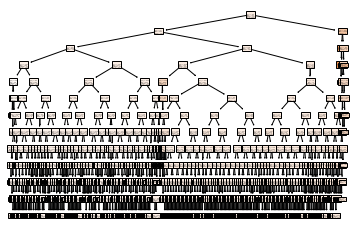

In [35]:
plot_tree(regr, filled=True)

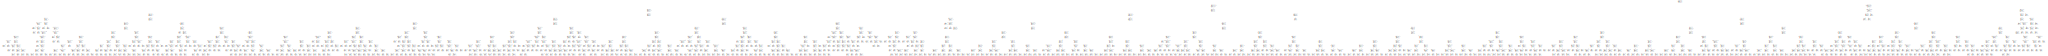

In [69]:
import graphviz
data = tree.export_graphviz(regr)
graph = graphviz.Source(data, format="png") 
graph

In [36]:
#Run Time Crash - Memory Issues

# from itertools import combinations 
# names = ['FIPS','Met Objective of 45.5? (1)',	'Age-Adjusted Death Rate',	'Lower 95% Confidence Interval for Death Rate',	'Upper 95% Confidence Interval for Death Rate',	'Average Deaths per Year	Recent Trend (2)',	'Recent 5-Year Trend (2) in Death Rates',	'Lower 95% Confidence Interval for Trend']

# p = list(combinations(names,2))
# # Parameters
# n_classes = 2
# plot_colors = "rby"
# plot_step = 0.1
# for pairidx, pair in enumerate(p):
  
#     # We only take the two corresponding features
#     X = dt[list(pair)]
#     y = dt['Upper 95% Confidence Interval for Trend']

#     # Train
#     clf = DecisionTreeClassifier().fit(X, y)

#     # Plot the decision boundary
#     plt.subplot(2, 3, pairidx + 1)

#     x_min, x_max = X[pair[0]].min() - 1, X[pair[0]].max() + 1
#     y_min, y_max = X[pair[1]].min() - 1, X[pair[1]].max() + 1
#     xx, yy = nm.meshgrid(nm.arange(x_min, x_max, plot_step),
#                          nm.arange(y_min, y_max, plot_step))
#     plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

#     Z = clf.predict(nm.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

#     plt.xlabel(pair[0])
#     plt.ylabel(pair[1])

#     # Plot the training points
#     for i, color in zip(range(n_classes), plot_colors):
#         idx = nm.where(y == i)
#         plt.scatter(X[pair[0]], X[pair[1]], c=color, label=['Upper 95% Confidence Interval for Trend'],
#                     cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

# plt.suptitle("Decision surface of a decision tree using paired features")
# plt.legend(loc='lower right', borderpad=0, handletextpad=0)
# plt.axis("tight")

# plt.figure()
# clf = DecisionTreeClassifier().fit(X, y)
# plot_tree(clf, filled=True)
# plt.show()



<font color='green'>**References**</font>



*   [Ref1](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

*   [Ref2](https://pbpython.com/categorical-encoding.html)


*   [Ref3](https://mljar.com/blog/visualize-decision-tree/)


*   [Ref4](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py)


*   [Ref5](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)

*   [Ref6](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)